In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from collections import Counter
from pyclustering.cluster.cure import cure
from src.utils_clustering import *
import pandas as pd

import time

In [72]:
N_CLASSES = 15

In [73]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
data = pd.read_csv(file_path, header=None, sep='\s+', names=['X', 'Y'])

# Assuming the dataset is already in a suitable format (two columns for X and Y coordinates)
# If your dataset includes headers or other non-numeric rows, make sure to preprocess it accordingly.
processed_data = data.values.tolist()
processed_data[:5]

[['X,Y', nan],
 ['0.6839115353098769,0.5435036726527372', nan],
 ['0.6857011238531137,0.5511360485409973', nan],
 ['0.6128098875297734,0.5702447166538899', nan],
 ['0.6355533713470528,0.5440473666182779', nan]]

In [74]:
# Remove the first entry if it's a header or non-numeric
if processed_data[0][0] == 'X,Y':
    raw_data = processed_data[1:]

# Split the string by comma and convert to float, ignore the second column as it's NaN
processed_data = [[float(coord) for coord in point[0].split(',')] for point in raw_data]
processed_data[:5]

[[0.6839115353098769, 0.5435036726527372],
 [0.6857011238531137, 0.5511360485409973],
 [0.6128098875297734, 0.5702447166538899],
 [0.6355533713470528, 0.5440473666182779],
 [0.6536933880753538, 0.6055935235174825]]

In [75]:
# Start measuring time
start_time = time.time()

cure_instance = cure(processed_data, N_CLASSES)
# Run FCM clustering
cure_instance.process()

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time
running_time_in_seconds = running_time / 60
running_time_in_seconds

0.01491318146387736

In [76]:
# Extract clusters
clusters = cure_instance.get_clusters()
labels_pred = np.zeros(len(processed_data))

for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels_pred[index] = cluster_id

In [77]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({6.0: 358, 1.0: 358, 11.0: 354, 4.0: 351, 10.0: 346, 12.0: 341, 7.0: 335, 14.0: 333, 0.0: 333, 9.0: 327, 2.0: 325, 13.0: 314, 5.0: 313, 3.0: 312, 8.0: 300})


In [78]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [79]:
labels_pred

array([8., 8., 8., ..., 6., 6., 6.])

In [80]:
clustering_algorithm_name = 'cure_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

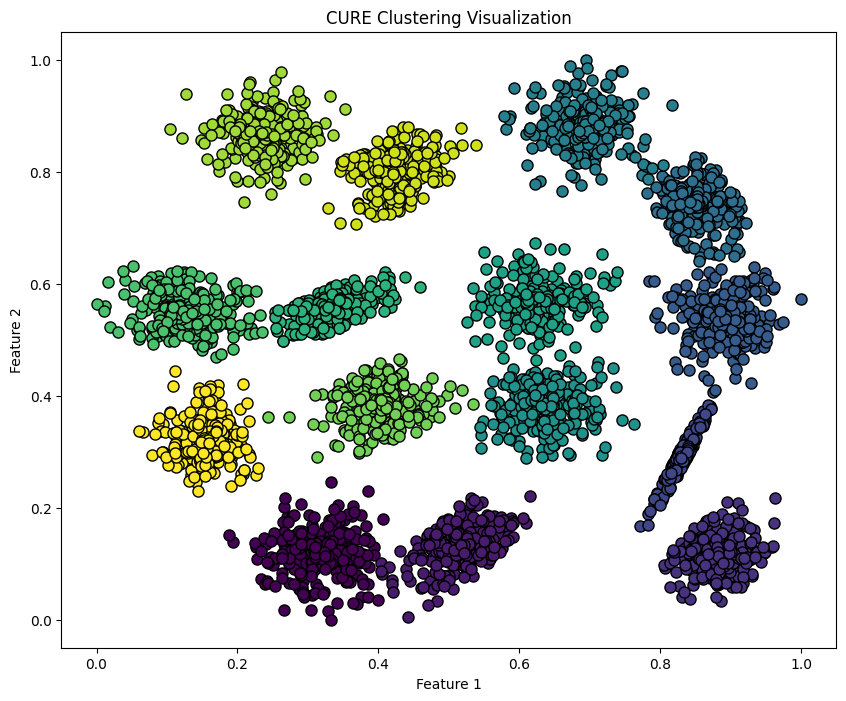

In [81]:
# Convert processed_data to a numpy array for plotting
processed_data_np = np.array(processed_data)

# Plot the clusters
plot_clusters_cure(processed_data_np, labels_pred)

In [82]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


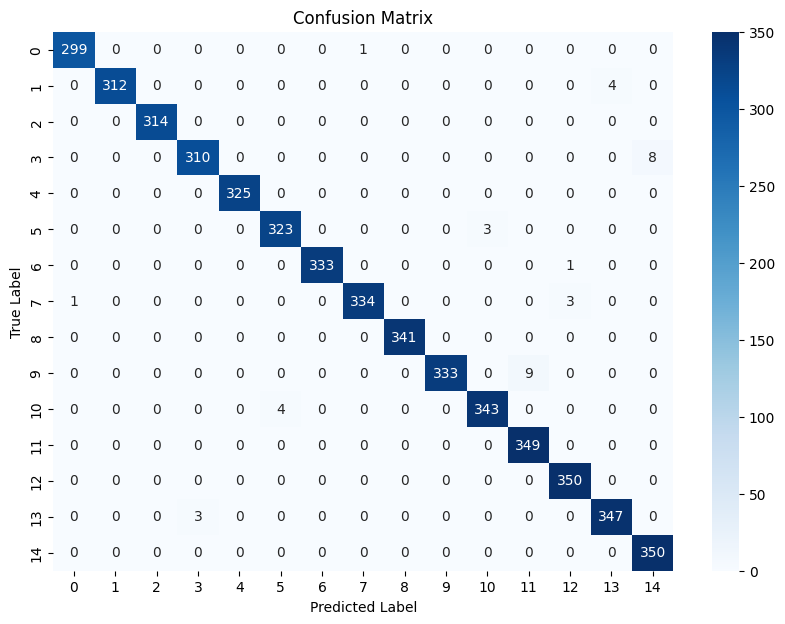


Overall Accuracy: 99.26%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [83]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [84]:
algorithm_params = ""
algorithm_details = str(algorithm_params)

In [85]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 13:07:18.607936
Dataset: s1
Clustering Algorithm: cure_clustering
Algorithm Details: 
Running Time (seconds): 0.8947908878326416
Accuracy: 0.9926
